# Clustering Penguin Species using KMeans Clustering

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv('/kaggle/input/clustering-penguins-species/penguins.csv')

# Data overview

In [3]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [6]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [9]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


# Data Preprocessing

<Axes: >

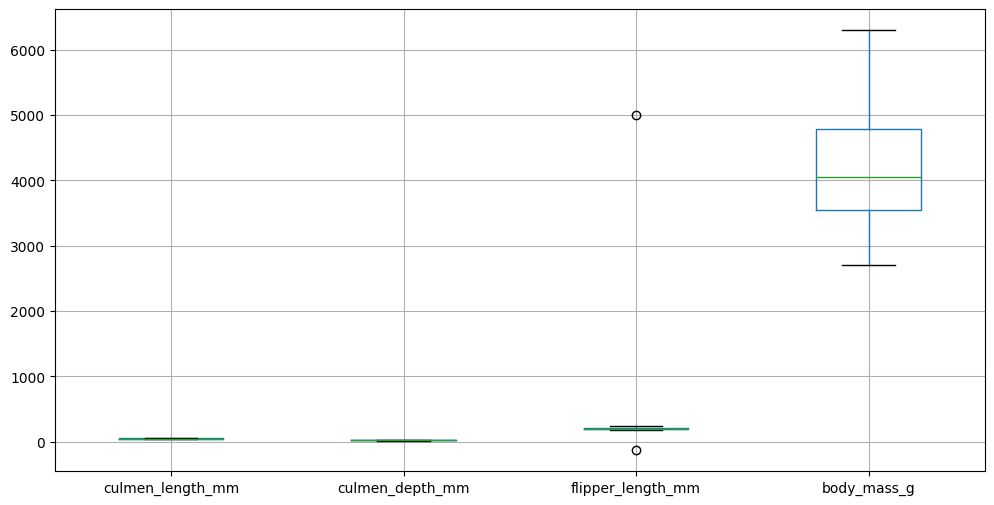

In [10]:
plt.figure(figsize = (12,6))
df.boxplot()

*We can observe 2 outliers for flipper length*

In [11]:
# removing outliers
print(df[df["flipper_length_mm"] > 4000])
print(df[df["flipper_length_mm"] < 0])

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9              42.0             20.2             5000.0       4250.0  MALE
    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
14              34.6             21.1             -132.0       4400.0  MALE


In [12]:
df = df.drop([9,14])

In [13]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Visulaization

<Axes: xlabel='sex', ylabel='count'>

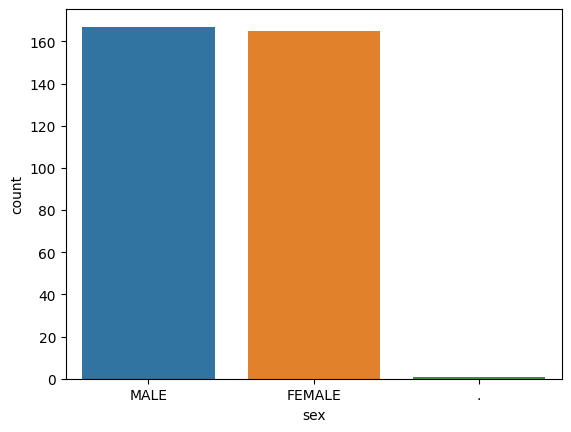

In [14]:
sns.countplot(x = 'sex', data = df)

In [15]:
df = df[df['sex']!='.']

<Axes: xlabel='sex', ylabel='count'>

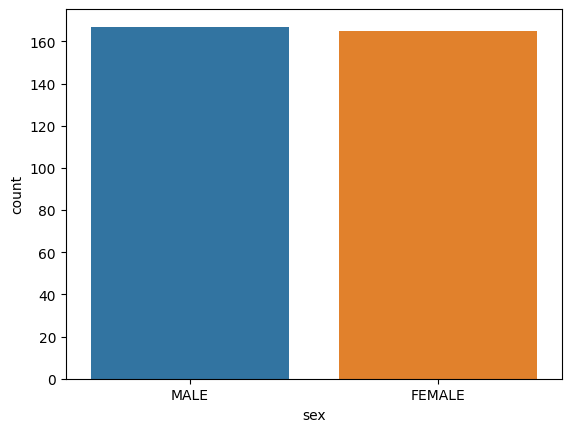

In [16]:
sns.countplot(x = 'sex', data = df)

In [17]:
df_num = df.select_dtypes(exclude=['object'])

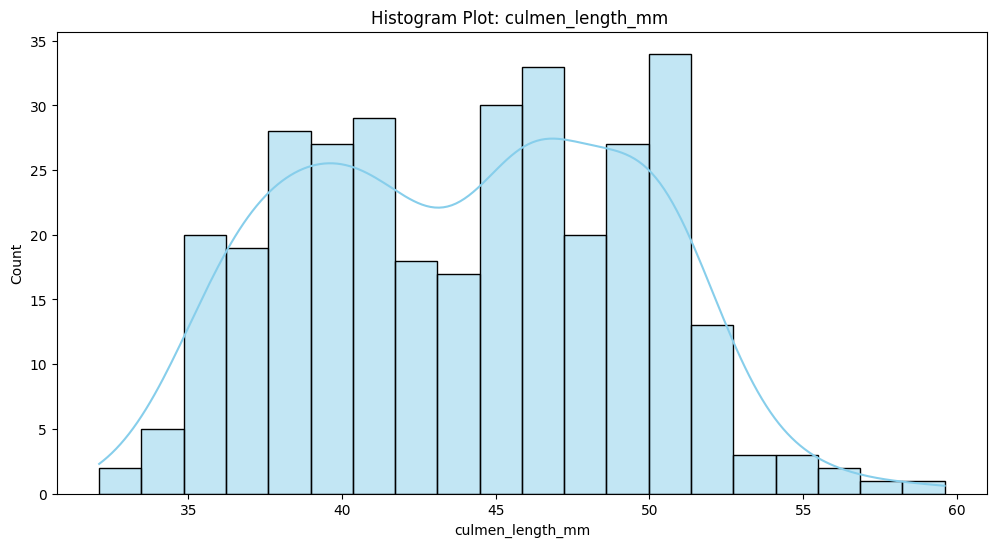

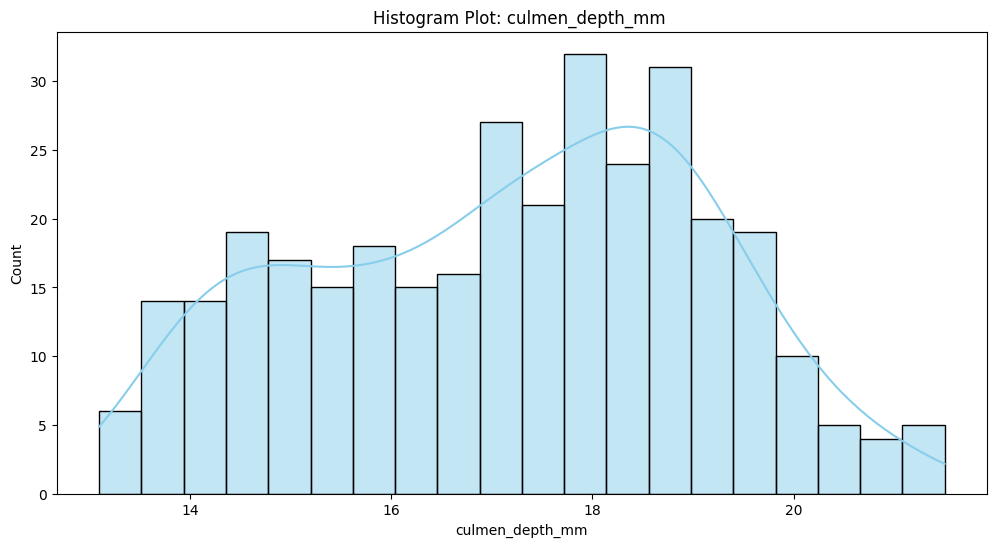

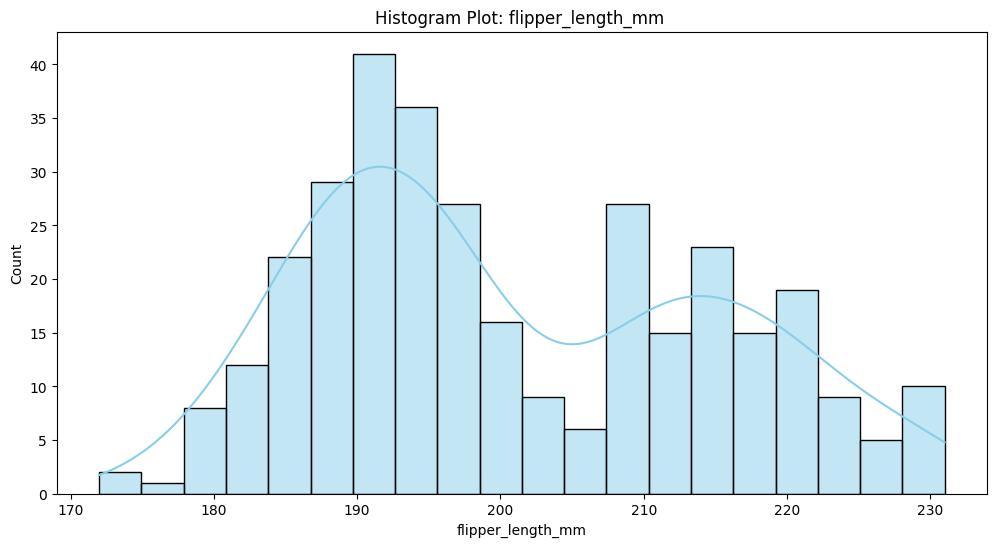

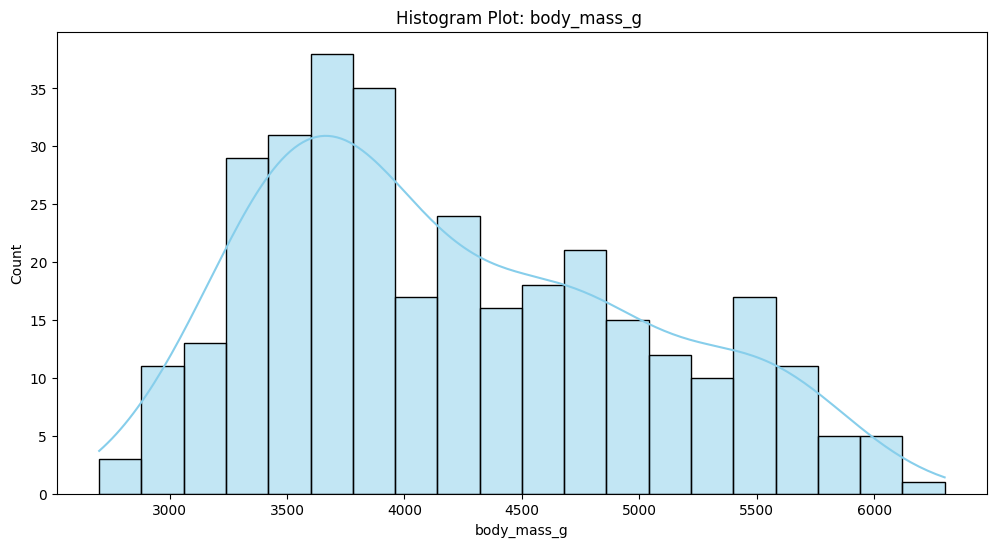

In [18]:
for col in df_num:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram Plot: {col} ')    
    plt.show()

# Clustering

In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

**Encoding Categorical variable**

In [20]:
le = LabelEncoder()

In [21]:
df['sex']=le.fit_transform(df['sex'])

In [22]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


**Standardizing the Data**

In [23]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [24]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
4,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
5,-0.867170,1.761074,-0.783164,-0.691149,0.993994


# Principle Component Analysis

In [25]:
pca = PCA(n_components=None)
df_pca = pca.fit(df)
df_pca.explained_variance_ratio_
n_components = sum(df_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
new_df_pca = pca.fit_transform(df)
print(n_components)

2


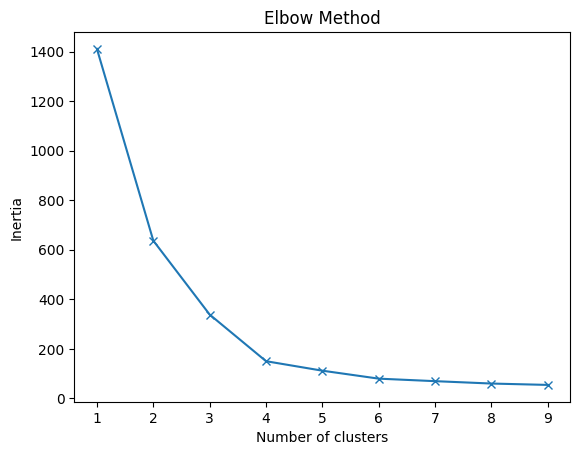

In [26]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(new_df_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse, marker="x")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

**Suggested : K = 4**

# Silhouette Score

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_df_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(new_df_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5306152382845915
For n_clusters=3, the silhouette score is 0.5700688888234272
For n_clusters=4, the silhouette score is 0.6551502355737143
For n_clusters=5, the silhouette score is 0.5997904174806167
For n_clusters=6, the silhouette score is 0.5852119241843082
For n_clusters=7, the silhouette score is 0.5339916196750294
For n_clusters=8, the silhouette score is 0.5131951681390579


**Optimal No of Clusters = 4**

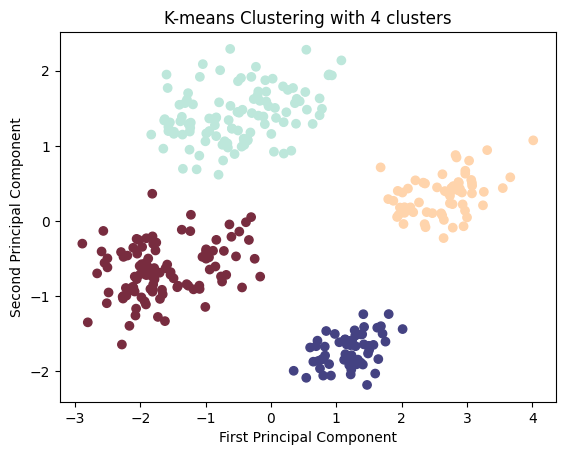

In [29]:
kmeans = KMeans(n_clusters = 4, random_state=42).fit(df)
plt.scatter(new_df_pca[:,0], new_df_pca[:,1], c=kmeans.labels_, cmap="icefire")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering with 4 clusters")
plt.show()

In [30]:
kmeans.labels_

array([0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 3, 1, 3, 3, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3,
       3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,

In [31]:
df['cluster']=kmeans.labels_

In [32]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994,0
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042,2
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042,2
4,-1.344738,1.096901,-0.569105,-0.939551,-1.006042,2
5,-0.867170,1.761074,-0.783164,-0.691149,0.993994,0
